# Combined subplot panel

This notebook loads the existing PDF subplot outputs and lays them out in a single 2x2 panel.


In [6]:
from pathlib import Path
import subprocess

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cwd = Path.cwd()
candidates = [cwd / 'output', cwd.parent / 'output', cwd.parent.parent / 'output']
output_dir = next((p for p in candidates if p.exists()), None)
if output_dir is None:
    raise FileNotFoundError(
        'Could not find output/ in cwd, parent, or grandparent: ' + str(cwd)
    )

pdf_files = [
    output_dir / 'Possion_regression_subplot.pdf',
    output_dir / 'hinge_subplots.pdf',
    output_dir / 'logistic_regression_subplot.pdf',
    output_dir / 'monte_carlo_subplot.pdf',
]

for path in pdf_files:
    if not path.exists():
        raise FileNotFoundError(f'Missing file: {path}')

tmp_dir = output_dir / '_tmp_combined_subplots'
tmp_dir.mkdir(exist_ok=True)

img_files = []
for pdf_path in pdf_files:
    png_path = tmp_dir / (pdf_path.stem + '.png')
    if not png_path.exists():
        subprocess.run(
            ['sips', '-s', 'format', 'png', str(pdf_path), '--out', str(png_path)],
            check=True,
            capture_output=True,
        )
    img_files.append(png_path)


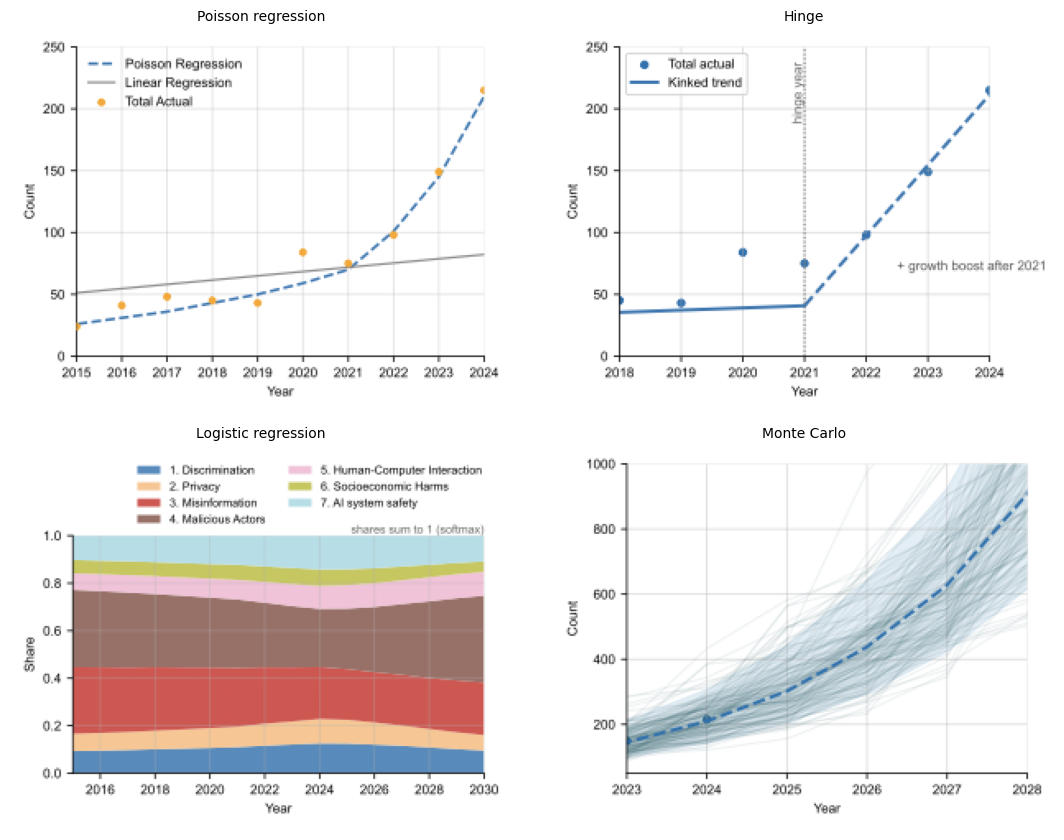

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(11 * 1, 8.5 * 1))
axes = axes.ravel()

titles = [
    'Poisson regression',
    'Hinge',
    'Logistic regression',
    'Monte Carlo',
]

for ax, title, path in zip(axes, titles, img_files):
    img = mpimg.imread(path)
    ax.imshow(img)
    ax.set_title(title, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()
